# Checking to see if younger soccer players are more expensive to buy.
This is aiming to see wether age has any correlation with price in the transfer market across all leagues 

### All the cleaning was done in clean.ipynb

First, the imports:

In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [5]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Note for the editor

### Most changes/removals are because we are trying to calculate trends of how parent clubs have assesed the value of their young players, and what buying clubs think is worth paying for. 

1. Loan trasfers are not included because we are simply looking at permananet transfers, by taking a loan, the amount of risk taken by a club is not as significant.

2. Transfers within the club were removed. Transfermarkt also adds players who have been promoted from the academy to the first team as a transfer, the registration change is not enough as a transfer. 

In [6]:
df = pd.read_csv('data.csv')
len(df)

10023

# I want to test if younger players are more expensive than older players

## Null Hypothesis: The fee of a player is not different for young players and old players (H0: Uy = Uo)
## Alternative Hypothesis: the fee of young players is higher than the fee of older players (H1: Uy > Uo)

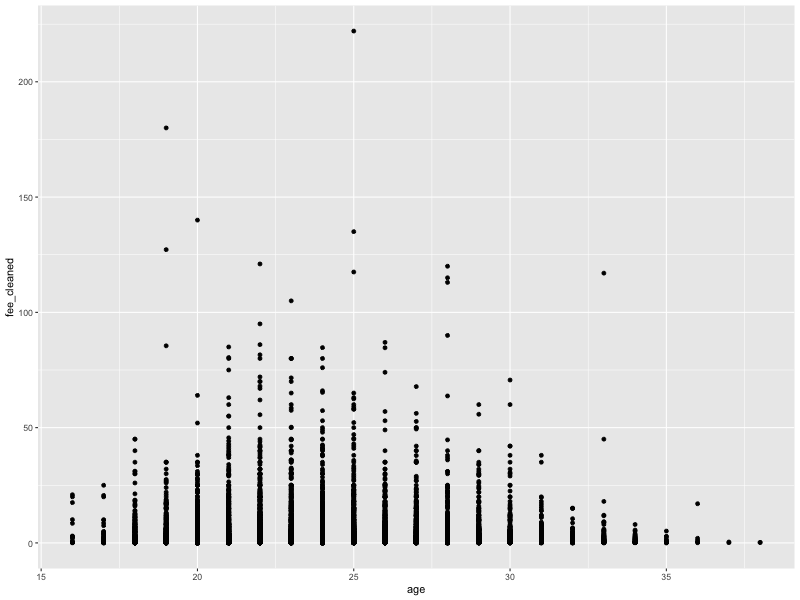

In [7]:
%%R -i df -w 800 -h 600
#This is just plotting all the data
ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point()

I thought I should draw a line. 

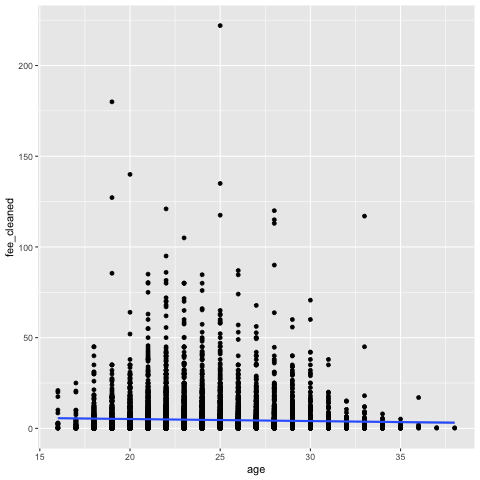

In [8]:
%%R

ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)

In [9]:
%%R

model <- lm(fee_cleaned ~ age, data=df)

summary(model)


Call:
lm(formula = fee_cleaned ~ age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -5.559  -4.065  -2.996  -0.066 217.409 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.40383    0.65714  11.267  < 2e-16 ***
age         -0.11251    0.02674  -4.207 2.61e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.542 on 10021 degrees of freedom
Multiple R-squared:  0.001763,	Adjusted R-squared:  0.001663 
F-statistic:  17.7 on 1 and 10021 DF,  p-value: 2.612e-05



### Analysis

I think that this model shows that players lose around 100K in value for every year they gain. The P values are also quite low. So there is something here. I may need to figure out filter out te data.

The line is not very regressive. I think this will not give me too much, so I should split the dataframe into two sets. 

In [24]:
#Make two new dataframes with players before their peak and after their peak
df_young = df[df['age'] < 26]
df_old = df[df['age'] >= 26]

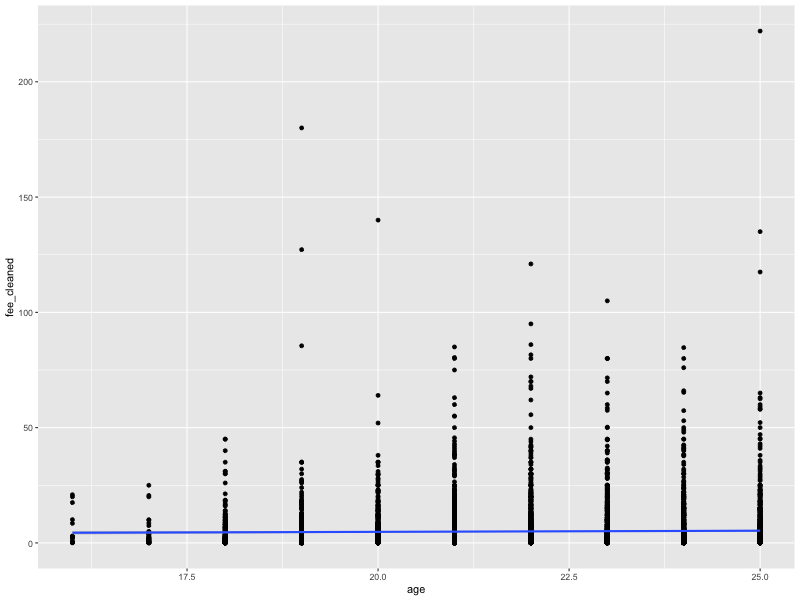

In [37]:
%%R -i df_young -w 800 -h 600

ggplot(df_young, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)


In [39]:
%%R

model <- lm(fee_cleaned ~ age, data=df_young)

summary(model)


Call:
lm(formula = fee_cleaned ~ age, data = df_young)

Residuals:
    Min      1Q  Median      3Q     Max 
 -5.282  -4.492  -3.291  -0.095 216.709 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.84095    1.37832   2.061   0.0393 *
age          0.09801    0.06192   1.583   0.1135  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.21 on 6486 degrees of freedom
Multiple R-squared:  0.0003861,	Adjusted R-squared:  0.000232 
F-statistic: 2.505 on 1 and 6486 DF,  p-value: 0.1135



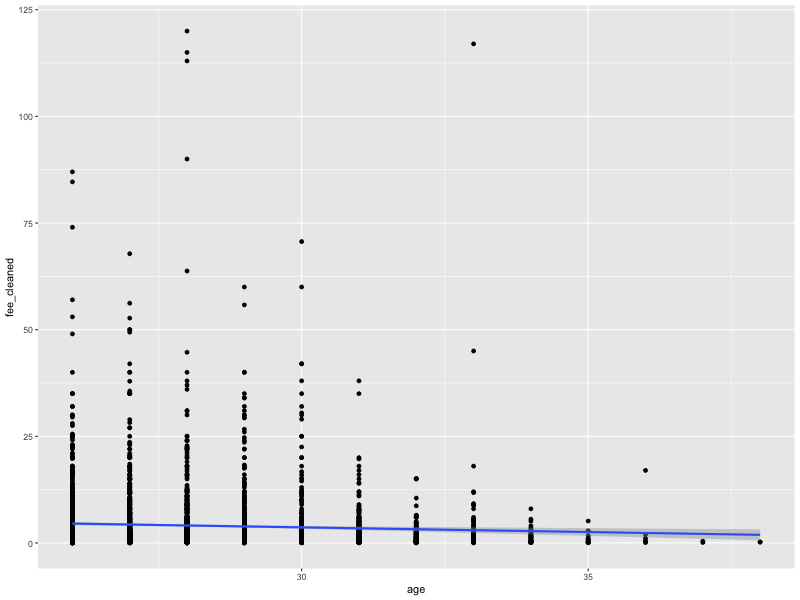

In [38]:
%%R -i df_old -w 800 -h 600

ggplot(df_old, aes(x=age, y=fee_cleaned)) +
    geom_point()+ 
    geom_smooth(method='lm', formula= y~x)

In [28]:
%%R

model <- lm(fee_cleaned ~ age, data=df_old)

summary(model)


Call:
lm(formula = fee_cleaned ~ age, data = df_old)

Residuals:
    Min      1Q  Median      3Q     Max 
 -4.520  -3.491  -2.421   0.007 115.909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.23713    1.86524   5.488 4.34e-08 ***
age         -0.21951    0.06585  -3.334 0.000866 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.157 on 3533 degrees of freedom
Multiple R-squared:  0.003136,	Adjusted R-squared:  0.002854 
F-statistic: 11.11 on 1 and 3533 DF,  p-value: 0.0008657



In [43]:
%%R -i df_young

res <- t.test(fee_cleaned~age, data=df_young)

R[write to console]: Error in t.test.formula(fee_cleaned ~ age, data = df_young) : 
  grouping factor must have exactly 2 levels




Error in t.test.formula(fee_cleaned ~ age, data = df_young) : 
  grouping factor must have exactly 2 levels


RInterpreterError: Failed to parse and evaluate line '\nres <- t.test(fee_cleaned~age, data=df_young)\n'.
R error message: 'Error in t.test.formula(fee_cleaned ~ age, data = df_young) : \n  grouping factor must have exactly 2 levels'